# Математика для машинного обучения
## Домашнее задание №2

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнила: Хужина Вария Тимуровна

## Статистика
### Описательные статистики
Для выборки $x_1, x_2, \ldots, x_n$ определены следующие величины (они часто называются *описательными статистиками*):

1. Выборочное среднее: $$\bar x = \frac{x_1 + x_2 + \ldots + x_n}{n}.$$
2. Выборочная дисперсия: $$\sigma^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n}.$$
3. Исправленная выборочная дисперсия: $$\sigma_+^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n - 1}.$$
4. Выборочное стандартное отклонение: квадратный корень из выборочной дисперсии (обозначается $\sigma$ или $SD$).
5. Исправленное выборочное стандартное отклонение: квадратный корень из исправленной выборочной дисперсии (обозначается $\sigma_+$ или $SD_+$ или ещё как-нибудь).
6. [Медиана](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%29).

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Для выборки $\{1, 10, 2, 15, 100\}$ найти все характеристики, перечисленные выше.

Подсказка: можно использовать функции `np.mean`, `np.var`, `np.std`, `np.median`. Для вычисления исправленной выборочной дисперсии и исправленного выборочного стандартного отклонения необходимо соответствующим функциям передать параметр `ddof=1`.

In [2]:
sample = [1, 10, 2, 15, 100]
print('Sample mean = ', np.mean(sample))
print('Sample variance = ', np.var(sample))
print('Sample variance + = ', np.var(sample, ddof=1))
print('Sample standart deviation = ', np.std(sample))
print('Sample standart deviation + = ', np.std(sample, ddof=1))
print('Sample median = ', np.median(sample))

Sample mean =  25.6
Sample variance =  1410.64
Sample variance + =  1763.3000000000002
Sample standart deviation =  37.55848772248425
Sample standart deviation + =  41.99166583978302
Sample median =  10.0


### Задача 2

Кракозяблики бывают двух типов — левые и правые. Для решения задачи распознавания типа кракозяблика по его фотографии раньше использовали алгоритм *QZD*. Он давал точность (accuracy) в 67%. Новый алгоритм *EQZD* был запущен 10 раз на разных датасетах и показал следующие accuracy: 69%, 63%, 70%, 72%, 63%, 73%, 72%, 70%, 70%, 61%. Правда ли, что алгоритм *EQZD* лучше алгоритма *QZD* с точки зрения показателя accuracy? Используйте t-тест для проверки этого утверждения. Сформулируйте нулевую гипотезу и альтернативу. Для вычисления p-value используйте функцию `ttest_1samp` из пакета `scipy.stats`. Проинтерпретируйте полученное p-value.

In [3]:
# H_0 - accuracy алгоритма EQZD равна accuracy алгоритма QZD = 67%
# H_1 - accuracy алгоритма EQZD больше accuracy алгоритма QZD

mean_QZD = 0.67
sample_EQZD = [0.69, 0.63, 0.70, 0.72, 0.63, 0.73, 0.72, 0.70, 0.70, 0.61]

# одновыборочный t-критерий Стьюдента
t_stat, pvalue = stats.ttest_1samp(sample_EQZD, mean_QZD)
print('t-statisctics =', t_stat, '\np-value =', pvalue)

t-statisctics = 0.951219512195123 
p-value = 0.36633740038827445


p-value = 0.5587... - вероятность получить тот результат который получили или еще более экстримальный, при условии, что нулевая гипотеза верна.

p-value > 0.05 (уровнь значимости), значит недостаточно данных для ответа на вопрос задачи.

### Задача 3
Будем проводить следующий эксперимент: сгенерируем две различные независимые выборки размером `n = 5` из равномерного распределения на отрезке $[0, 1]$. С помощью теста Стьюдента проверим гипотезу о том, что эти две выборки были получены из распределений с различными средними ($H_0\colon m_1 = m_2$, $H_1\colon m_1 ≠ m_2$) на уровне значимости 5%.

Повторим этот эксперимент 10000 раз. Сколько раз мы будем совершать ошибку первого рода, то есть ошибочно отвергать нулевую гипотезу? Что будет, если изменить уровень значимости (например, использовать уровень значимости 1%)? Что будет, если увеличить размер выборки до `n = 20`?

Для генерирования выборок можно использовать `uniform.rvs`, для двухвыборочного теста Стьюдента — `ttest_ind` (обе функции из пакета `scipy.stats`). Последняя функция возвращает пару, состоящую из значения t-статистики и p-value.

In [4]:
def student_test(alpha, sample_size, number_of_samples):
    number_of_rejections = 0  #количество раз, когда мы отвергли нулевую гипотезу   
        
    #цикл по количеству выборок
    for i in range(number_of_samples):
        sample_1 = stats.uniform.rvs(size=sample_size)  #первая выборка
        sample_2 = stats.uniform.rvs(size=sample_size)  #вторая выборка
        m1 = np.mean(sample_1)    #мат. ожидание                      
        m2 = np.mean(sample_2)
        t_stats, Pvalue = stats.ttest_ind(sample_1, sample_2)  #t-тест
        #сравнение c заданным уровнем значимости:
        if Pvalue < alpha:
            number_of_rejections +=1  #подстчет количества количество раз, когда мы отвергли нулевую гипотезу 
    #доля ошибок:                                
    mistakes_ratio = number_of_rejections/number_of_samples
    #вывод результатов:
    print('Number of rejections  {}'.format(number_of_rejections))
    
    if number_of_samples==1:
        print('mean_1 =', m1)
        print('mean_2 =', m2)
        print('p-value =', Pvalue)
    else:
        print('Mistakes rate is', mistakes_ratio)

In [5]:
student_test(alpha=0.05, sample_size=5, number_of_samples=1)

Number of rejections  0
mean_1 = 0.40636423412921496
mean_2 = 0.5723720180762553
p-value = 0.401800080658523


In [6]:
student_test(alpha=0.05, sample_size=5, number_of_samples=10000)

Number of rejections  530
Mistakes rate is 0.053


In [7]:
student_test(alpha=0.01, sample_size=5, number_of_samples=10000)

Number of rejections  119
Mistakes rate is 0.0119


In [8]:
student_test(alpha=0.01, sample_size=20, number_of_samples=10000)

Number of rejections  97
Mistakes rate is 0.0097


In [9]:
student_test(alpha=0.005, sample_size=1000, number_of_samples=10000)

Number of rejections  54
Mistakes rate is 0.0054


Так как заранее известно, что две выборки имеют стандарное равномерное распределение, значит их "истинное" мат. ожидание равно 0.5, стало быть отвергая нулевую гипотезу о равненстве их мат. ожиданий мы совершаем ошибку первого рода. Чем меньше уровень значимости, тем "осторожнее" мы отвергаем нулевую гипотезу, и, как видно из примера, количество отвергнутых гипотех при $\alpha = 5$% больше, чем при $\alpha = 1$%, с другой стороны когда размер выборок большой, т.е. больше данных количество ошибок уменьшается.

### Задача 4
Напомним, что для выборки $x=\{x_1, x_2, \ldots, x_n\}$, сгенерированной из некоторой генеральной совокупности $X$, $Z$-статистика вычисляется так:

$$
Z = \frac{\bar x - EX}{\sigma_X} \sqrt{n},
$$
где $EX$ — среднее по генеральной совокупности (или, что то же самое, математическое ожидание случайной величины $X$), $\sigma_X$ — стандартное отклонение по генеральной совокупности (или, что то же самое, стандартное отклонение случайной величины $X$), $n$ — число элементов в выборке, $\bar x = \frac{x_1 + \ldots + x_n}{n}$ — выборочное среднее.

Для статистических тестов использовать $Z$-статистику сложно, посольку мы обычно не знаем стандартного отклонения по генеральной совокупности $\sigma_X$. Зато мы можем вычислить исправленное выборочное стандартное отклонение $\sigma_+(x)$. Оно будет приближать $\sigma_X$. Если заменить в формуле для $Z$-статистики $\sigma_X$ на $\sigma_+(x)$, получится формула для t-статистики:

$$
t = \frac{\bar x - EX}{\sigma_+(x)} \sqrt{n},
$$

Распределение $t$-статистики не является нормальным (по крайней мере, при не слишком больших $n$), но также является известным.

Вычислите $t$-статистику для задачи 2 по указанной выше формуле. (В качестве $EX$ необходимо подставить значение в 67%, оно берётся из нулевой гипотезы.) Убедитесь, что оно совпадает со значением, которое выдаёт функция `ttest_1samp`.

t* =  0.9512195121951231
p-value is summ of F(t < -t*) and F(t > t*)
F(t < -t*) = 0.18316870019413717 
F(t > t*)= 0.1831687001941371
p-value = 0.3663374003882742


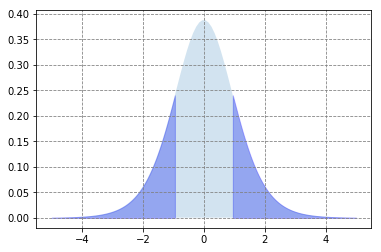

In [10]:
#ПРОВЕКА 2 задачи
from scipy.stats import t
n = len(sample_EQZD)
t_value = (np.mean(sample_EQZD) - mean_QZD)/(np.std(sample_EQZD, ddof=1)/np.sqrt(n))
#изобразим распределение Стьюдента
x_1 = np.linspace(-5,-t_value, 100)
x_2 = np.linspace(t_value, 5,  100)
x = np.linspace(-5, 5,  100)
plt.grid(linestyle='--', color='grey')
plt.fill_between(x_1,0, t.pdf(x_1, df=(n-1)), alpha=0.3, color='blue')
plt.fill_between(x_2,0, t.pdf(x_2, df=(n-1)), alpha=0.3, color='blue')
plt.fill(x, t.pdf(x, df=(n-1)), alpha=0.2)
print('t* = ', t_value)
print('p-value is summ of F(t < -t*) and F(t > t*)')
print('F(t < -t*) =', t.cdf(-t_value, df=(n-1)), '\nF(t > t*)=', 1 -t.cdf(t_value, df=(n-1)))
print('p-value =', t.cdf(-t_value, df=(n-1)) + 1 -t.cdf(t_value, df=(n-1)))